In [1]:
### IRIS DATASET
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.datasets import load_iris#iris dataset
##import Kmeans
from sklearn.cluster import KMeans

In [2]:
# pass into the variable-iris_new
iris_new=load_iris()
iris=pd.DataFrame(iris_new.data)#to fetch the data
iris_new.feature_names
##passsing the iris columns
iris.columns=iris_new.feature_names
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


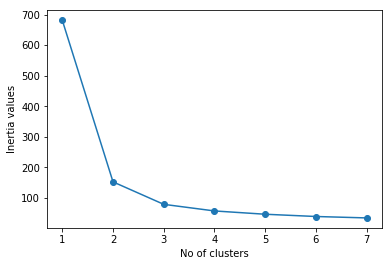

In [3]:
# Elbow method to find the optimal value of clusters
import matplotlib.pyplot as plt
%matplotlib inline
ks=range(1,8)
inertia=[]
for k in ks:
    # Def the model,
    model=KMeans(n_clusters=k)
    # Fit the model,
    model.fit(iris)
    #Append the inertia
    inertia.append(model.inertia_)
plt.plot(ks,inertia,"-o")
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

Text(0,0.5,'Distance Measure')

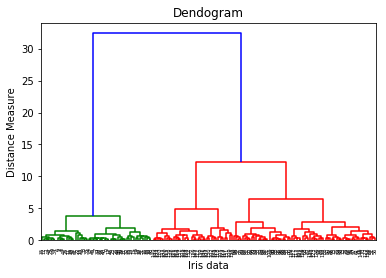

In [4]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(iris,method='ward'))
plt.title('Dendogram')
plt.xlabel('Iris data')
plt.ylabel('Distance Measure')

# College Dataset

In [5]:
# 4.	Consider the University Dataset with the 777 Rows and 18 Columns.Here, you need to identify the optimum cluster size 
# by using K Means. 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [6]:
Data=pd.read_csv('+College+Data.csv')

In [7]:
Data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
Data.shape

(777, 19)

In [9]:
Data=Data.drop('Unnamed: 0',axis=1)

In [10]:
Data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
Df_data=pd.get_dummies(Data,drop_first=True)
Df_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [12]:
Df_data.shape

(777, 18)

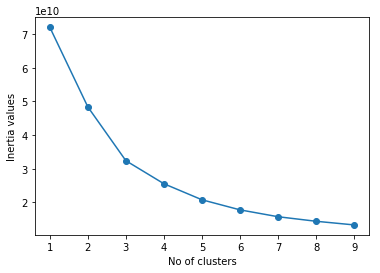

In [13]:
### Elbow method
ks=range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(Df_data)
    inertia.append(model.inertia_)
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [14]:
models=KMeans(n_clusters=6)
models.fit(Df_data)
labels=models.predict(Df_data)
labels

array([0, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 5, 4,
       3, 2, 3, 0, 3, 4, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 4, 3, 0, 0, 0,
       1, 0, 0, 1, 3, 3, 0, 0, 0, 0, 3, 0, 4, 0, 3, 2, 1, 4, 1, 3, 1, 0,
       0, 3, 3, 2, 1, 1, 1, 3, 3, 3, 0, 3, 4, 4, 3, 0, 0, 3, 3, 0, 1, 5,
       3, 0, 3, 1, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 4, 4, 0, 0, 3, 1, 1, 3,
       3, 3, 0, 0, 1, 1, 3, 1, 4, 0, 3, 3, 1, 1, 3, 4, 0, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 1, 3, 1, 1, 4, 0, 3, 5, 3, 0, 3, 0, 1, 3, 3, 1, 0,
       0, 0, 3, 3, 5, 1, 3, 0, 1, 3, 1, 0, 0, 0, 0, 0, 3, 3, 1, 3, 5, 1,
       4, 4, 0, 3, 0, 4, 3, 0, 1, 3, 3, 3, 0, 3, 0, 5, 0, 3, 3, 0, 1, 0,
       3, 0, 3, 4, 0, 2, 0, 3, 0, 0, 0, 3, 3, 0, 3, 1, 3, 0, 0, 3, 4, 1,
       0, 1, 4, 4, 0, 1, 0, 3, 3, 3, 1, 3, 0, 4, 3, 0, 3, 1, 0, 3, 3, 3,
       1, 3, 3, 4, 0, 0, 0, 1, 5, 1, 0, 0, 3, 3, 1, 4, 1, 3, 3, 3, 0, 3,
       0, 0, 3, 0, 1, 4, 3, 3, 0, 4, 2, 0, 3, 2, 1, 4, 0, 0, 0, 3, 5, 0,
       3, 3, 4, 0, 0, 0, 1, 3, 3, 0, 1, 0, 3, 1, 0,

# Titanic Dataset

In [15]:
Train=pd.read_csv('train-1.csv')

In [16]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
Train.shape

(891, 12)

In [18]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
Train=Train.drop(['Cabin','Ticket'],axis=1)

In [20]:
#misssing values for age
l1=[]
firstletter=list(Train['Name'])
for k in firstletter:
    t1=k.split(',')[1]
    t2=t1.split('.')[0]
    l1.append(t2)
Train['title']=l1
medi=Train.groupby('title').Age.transform('median')
Train.Age.fillna(medi,inplace=True)


In [21]:
Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
Train.Embarked.fillna('S',inplace=True)

In [23]:
Train['Survived']=Train['Survived'].astype('category')
Train.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
title            object
dtype: object

In [24]:
Train=Train.drop(['Name','PassengerId','Embarked'],axis=1)
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
0,0,3,male,22.0,1,0,7.2500,Mr
1,1,1,female,38.0,1,0,71.2833,Mrs
2,1,3,female,26.0,0,0,7.9250,Miss
3,1,1,female,35.0,1,0,53.1000,Mrs
4,0,3,male,35.0,0,0,8.0500,Mr


In [25]:
df=pd.get_dummies(Train,drop_first=False)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Sex_female,Sex_male,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


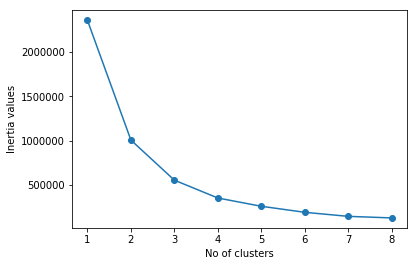

In [26]:
### Elbow method

ks=range(1,9)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [27]:
models=KMeans(n_clusters=4)
models.fit(df)
labels=models.predict(df)
labels

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,

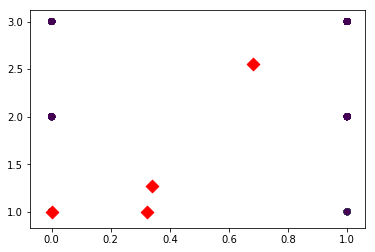

In [28]:
# Finding the centroids
centroids=models.cluster_centers_
centroid_x=centroids[:,5]
centroid_y=centroids[:,0]
xs=df.iloc[:,5]
ys=df.iloc[:,0]
#plot the centroids with centroid location
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

Text(0,0.5,'Distance Measure')

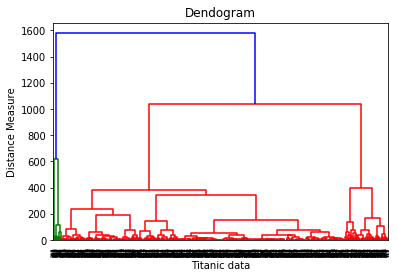

In [29]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendogram')
plt.xlabel('Titanic data')
plt.ylabel('Distance Measure')

# MNIST Dataset

In [47]:
# importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
data=pd.read_csv('trainMNIST.csv')

In [31]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.shape

(42000, 785)

In [33]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [89]:
x=data.drop('label',axis=1)
y=data.label


In [90]:
# Split train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [91]:
#apply standard scaler
sc=StandardScaler()
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [92]:
### PCA
pc=PCA(n_components=150)
xtrain1=pc.fit_transform(xtrain)
xtest1=pc.transform(xtest)
expvariance=pc.explained_variance_ratio_

In [93]:
expvariance

array([0.05828913, 0.04147097, 0.03793347, 0.02945915, 0.02580711,
       0.02253134, 0.01975557, 0.01780605, 0.01582313, 0.01430546,
       0.01370258, 0.01235252, 0.01149154, 0.01117423, 0.01059799,
       0.0101857 , 0.00954942, 0.00938936, 0.00913028, 0.00884508,
       0.0084133 , 0.00814689, 0.00783213, 0.00756797, 0.00732675,
       0.0070422 , 0.00696023, 0.00672802, 0.00634347, 0.00620097,
       0.00613023, 0.00603741, 0.00581298, 0.0057854 , 0.00561649,
       0.00549316, 0.00542418, 0.00527506, 0.0051098 , 0.00499837,
       0.0049264 , 0.0048309 , 0.00472054, 0.00467489, 0.00455732,
       0.00452754, 0.00448158, 0.00444022, 0.00438467, 0.00426536,
       0.00421095, 0.00411481, 0.00409537, 0.00403148, 0.00398111,
       0.00396944, 0.00389697, 0.00385593, 0.00376817, 0.00370813,
       0.00367532, 0.00359183, 0.00353773, 0.00347521, 0.00345812,
       0.00343964, 0.00340937, 0.00335825, 0.00328325, 0.00324284,
       0.00316213, 0.00312574, 0.003116  , 0.00307235, 0.00304

In [94]:
pc.explained_variance_ratio_.sum()

0.8139670196036883

In [95]:
# Define the classifier
lg=LogisticRegression()
#fitting and predicting the model
model_lg=lg.fit(xtrain1,y_train)
pred=lg.predict(xtest1)
### calculating the accuracy score
accuracy_score(y_test,pred)*100

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


91.01190476190476

In [96]:
# fitting model on Decision tree classifier
model=DecisionTreeClassifier(criterion = 'entropy',random_state=123)
model.fit(xtrain1,y_train)
ypred_dt=model.predict(xtest1)
accuracy_sc=metrics.accuracy_score(y_test,ypred_dt)
accuracy_sc

0.8214285714285714

In [97]:
# fitting model on Random forest classifier
model_rf=RandomForestClassifier(criterion = 'entropy',random_state=123)
model_rf.fit(xtrain1,y_train)
ypred_rf=model.predict(xtest1)
accuracy_sc=metrics.accuracy_score(y_test,ypred_rf)
accuracy_sc

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8214285714285714